# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: There are many factors involved in decision making for accepting a student to graduate school. Some of the most important factors are student's GPA, GRE and undergradute school rank. This study aims at predicting the probability of each students acceptance based on the student's GPA, GRE and undergradute school rank as well as determining the effect of each variable on the outcome.

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: Variable | Description | Type of Variable
---| ---| ---
admit | 0 = not admitted 1 = admited | categorical
gre | GRE score of applicant | continuous 
gpa | Grade Point Average of applicant | continuous 
prestige | Applicant's undergraduate alma mater rank 0 to 4. 0 = lowest 4 = highest | categorical

There were missing values in gre, gpa, and prestige data, all of the missing data were dropped

### Demo: Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean(std)  | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

C:\Users\mahan.hadjizadeh\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [3]:
dummy_ranks = pd.get_dummies(df['prestige'],prefix='prestige')
cols_to_keep = ['admit', 'gre', 'gpa']
df2 = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_1':])
print df2.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


In [55]:
##data.groupby(['col1', 'col2'])['col3'].mean()
print df2.groupby(['admit'], as_index=False)['gre'].mean()
print df2.groupby(['admit'], as_index=False)['gpa'].mean()
print df2.groupby(['admit'], as_index=False)['prestige_1.0'].sum()
print df2.groupby(['admit'], as_index=False)['prestige_2.0'].sum()
print df2.groupby(['admit'], as_index=False)['prestige_3.0'].sum()
print df2.groupby(['admit'], as_index=False)['prestige_4.0'].sum()

   admit         gre
0      0  573.579336
1      1  618.571429
   admit       gpa
0      0  3.347159
1      1  3.489206
   admit  prestige_1.0
0      0            28
1      1            33
   admit  prestige_2.0
0      0            95
1      1            53
   admit  prestige_3.0
0      0            93
1      1            28
   admit  prestige_4.0
0      0            55
1      1            12


### Methods: Write up the methods used in your analysis

Answer: To predict the probability of admission into the gradadute school used the logistic regression model

### Results: Write up your results

Answer:
- As the value of GPA increases the probability of admission increases
- As the value of GRE increases the probability of admission increases
- The odds of getting adimtted to the program if the student attends #2 ranked college is 0.5 times, #3 ranked college is 0.26 times, #4 ranked college is 0.21 the odds if the student attended #1 ranked college.

### Visuals: Provide a table or visualization of these results

<img src='placeholder.png' height= 25% width= 25%>

In [57]:
df2['intercept'] = 1.0
x = df2[['intercept','gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']]
y = df2['admit']
lm = sm.Logit(y, x)
result = lm.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


In [59]:
result.summary()
np.exp(result.params)

intercept       0.020716
gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
dtype: float64

In [60]:
x2 = df2[['intercept','gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']]

df2['admit'] = result.predict(x2)
df2.tail()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0,intercept
395,0.483948,620.0,4.00,0,1,0,0,1.0
396,0.167418,560.0,3.04,0,0,1,0,1.0
397,0.184392,460.0,2.63,0,1,0,0,1.0
398,0.460202,700.0,3.65,0,1,0,0,1.0
399,0.298832,600.0,3.89,0,0,1,0,1.0


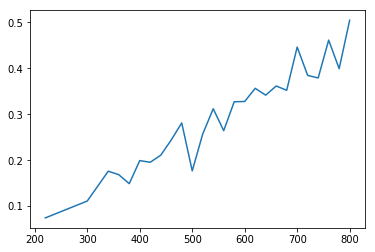

In [61]:
chart1 = df2.groupby(['gre']).mean()
plt.plot(chart1.index.values,chart1.admit.values)
plt.show()

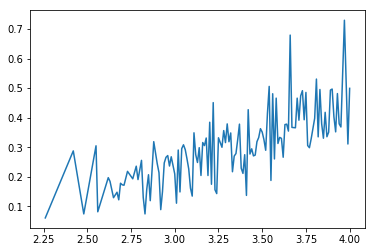

In [62]:
chart2 = df2.groupby(['gpa']).mean()
plt.plot(chart2.index.values,chart2.admit.values)
plt.show()

### Discussion: Write up your discussion and future steps

Answer: In future steps would like to increase the accuracy of the model by using different algorithms.